In [12]:
#구글 드라이브 연결 
from google.colab import drive

drive.mount('/gdrive')

Mounted at /gdrive


In [6]:
import sys, os
import pickle
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import keras
from keras.datasets import mnist #keras.datasets의 mnist 이용

In [56]:
 #mnist 데이터 읽기
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

#데이터 구조 확인
print('x_train.shape :', x_train.shape)
print('t_train.shape :', y_train.shape)
print('x_test.shape :', x_test.shape)
print('t_test.shape :', y_test.shape)

x_train.shape : (60000, 28, 28)
t_train.shape : (60000,)
x_test.shape : (10000, 28, 28)
t_test.shape : (10000,)


y_train[0] (x_train[0] label) = 5
y_train[1] (x_train[1] label) = 0


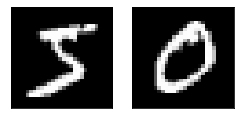

In [58]:
#이미지 확인
plt.figure(figsize=(4, 2))
plt.subplot(121)
img = x_train[0].reshape(28, 28) 
plt.imshow(img, 'gray')
plt.xticks([]), plt.yticks([]);
plt.subplot(122)
img = x_train[1].reshape(28, 28)
plt.imshow(img, 'gray')
plt.xticks([]), plt.yticks([]);
print("y_train[0] (x_train[0] label) =", y_train[0])
print("y_train[1] (x_train[1] label) =", y_train[1])

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [32]:
# mnist에서 테스트 데이터만 반환
def get_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    return x_test, y_test
#sample_weight.pkl 에 저장된 학습된 가중치 가져오기
def init_network():
    with open('/gdrive/My Drive/DeepLearning/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network
#학습된 network에 x 값을 입력하여 결과 y 반환
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [53]:
#(1)테스트 데이터만 가져오기
x, t = get_data()
print("x.shape=", x.shape)  #28*28 이미지 10000개
print("t.shape=", t.shape)

#(2) 28*28 2차원을 784 1차원으로 변경(flatten)
x = np.array(x).reshape(x.shape[0], x.shape[1]*x.shape[2])    
print("x.shape=", x.shape)
print("t.shape=", t.shape)
#print(x[:28*28])   #첫번째 이미지 값 확인

#(3) 0~255  값을 0~1 실수값으로 변경 (normalization)
x = x / 255.0      
#print(x[:28*28])   #첫번째 이미지 값 확인

#학습된 네트워크 얻기
network = init_network()

x.shape= (10000, 28, 28)
t.shape= (10000,)
x.shape= (10000, 784)
t.shape= (10000,)


In [55]:
accuracy_cnt = 0
for i in range(len(t)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1
print("Accuracy:" + str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


배치처리

In [ ]:
x, t = get_data()
network = init_network()

In [ ]:
batch_size = 100  # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt)/len(x)))